In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
sub=pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [3]:
sub

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
train_data=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

In [6]:
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [7]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
train_data.shape

(20758, 18)

In [10]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [11]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [13]:
features=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
         'Gender','family_history_with_overweight', 'FAVC',
       'SMOKE','SCC','CALC']

In [14]:
ytrain_data=train_data['NObeyesdad']

In [15]:
ytrain_data

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [16]:
train_df=train_data[features]

In [17]:
train_df.shape

(20758, 14)

In [18]:
ytrain_data.shape

(20758,)

In [19]:
categories = ['Overweight_Level_II', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_I',
       'Insufficient_Weight']

# Create a DataFrame with categorical data
ytrain = pd.DataFrame({'NObeyesdad ': categories})

# Define the mapping function
def map_to_numerical(NObeyesdad ):
    return categories.index(NObeyesdad)

# Apply the mapping function to create a new numerical column
ytrain = ytrain_data.apply(map_to_numerical)
ytrain

0        0
1        4
2        6
3        3
4        0
        ..
20753    1
20754    6
20755    1
20756    0
20757    1
Name: NObeyesdad, Length: 20758, dtype: int64

In [20]:
xtrain,xval,ytrain,yval=train_test_split(train_df,ytrain,test_size=0.1, random_state=1)

In [21]:
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(18682, 14)
(2076, 14)
(18682,)
(2076,)


In [22]:
ytrain.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [23]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model1=DecisionTreeClassifier(max_depth=11, random_state=1)
model2=LogisticRegression()
model3=XGBClassifier(max_depth=11, random_state=1)
model4=LGBMClassifier(max_depth=11, random_state=1)

In [24]:
model

RandomForestClassifier(random_state=42)

In [25]:
model1

DecisionTreeClassifier(max_depth=11, random_state=1)

In [26]:
model2

LogisticRegression()

In [27]:
model3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [28]:
model4

LGBMClassifier(max_depth=11, random_state=1)

In [29]:
xtrain=pd.get_dummies(xtrain)
xval=pd.get_dummies(xval)

In [30]:
ytrain

17254    0
5558     1
5260     1
16396    2
10295    0
        ..
10955    4
17289    3
5192     4
12172    6
235      4
Name: NObeyesdad, Length: 18682, dtype: int64

In [31]:
rfmodel=model.fit(xtrain,ytrain)
dmodel=model1.fit(xtrain,ytrain)
lgmodel=model2.fit(xtrain,ytrain)
xgbmodel=model3.fit(xtrain,ytrain)
lgbmmodel=model4.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 18682, number of used features: 21
[LightGBM] [Info] Start training from score -2.097699
[LightGBM] [Info] Start training from score -1.848811
[LightGBM] [Info] Start training from score -1.969744
[LightGBM] [Info] Start training from score -1.646627
[LightGBM] [Info] Start training from score -1.902236
[LightGBM] [Info] Start training from score -2.146402
[LightGBM] [Info] Start training from score -2.107781


In [32]:
rfpred=rfmodel.predict(xval)
dpred=dmodel.predict(xval)
lgpred=lgmodel.predict(xval)
xgbpred=xgbmodel.predict(xval)
lgbmpred=lgbmmodel.predict(xval)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [33]:
rfpred

array([1, 6, 5, ..., 0, 6, 2])

In [34]:
dpred

array([1, 6, 5, ..., 0, 6, 2])

In [35]:
lgpred

array([1, 6, 5, ..., 0, 6, 2])

In [36]:
xgbpred

array([1, 6, 5, ..., 0, 6, 2])

In [37]:
lgbmpred

array([1, 6, 5, ..., 0, 6, 2])

In [38]:
yval

17392    1
14299    6
14753    5
15306    5
16482    5
        ..
9729     1
16759    4
11672    0
20754    6
9909     2
Name: NObeyesdad, Length: 2076, dtype: int64

In [39]:
val_accuracy=accuracy_score(yval,rfpred)
val_accuracy1=accuracy_score(yval,dpred)
val_accuracy2=accuracy_score(yval,lgpred)
val_accuracy3=accuracy_score(yval,xgbpred)
val_accuracy4=accuracy_score(yval,lgbmpred)
print(f'validation accuracy is:{val_accuracy}')
print(f'validation accuracy is:{val_accuracy1}')
print(f'validation accuracy is:{val_accuracy2}')
print(f'validation accuracy is:{val_accuracy3}')
print(f'validation accuracy is:{val_accuracy4}')

validation accuracy is:0.890655105973025
validation accuracy is:0.8790944123314065
validation accuracy is:0.7182080924855492
validation accuracy is:0.8998073217726397
validation accuracy is:0.9079961464354528


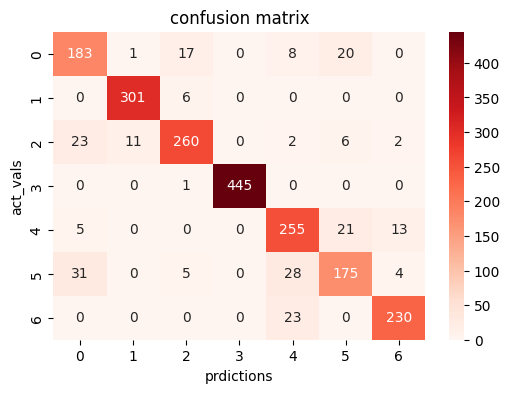

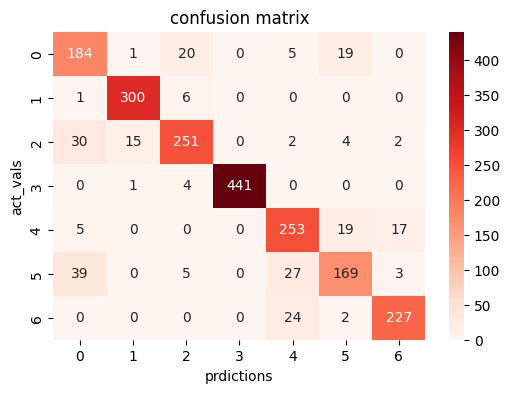

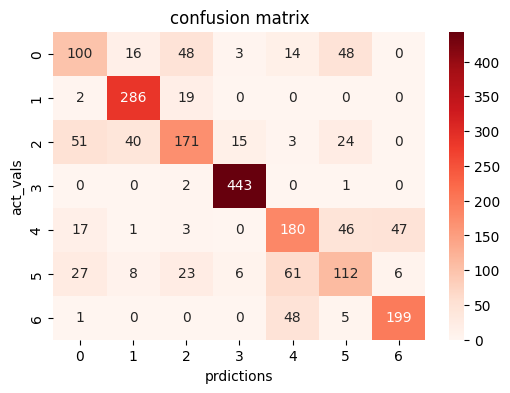

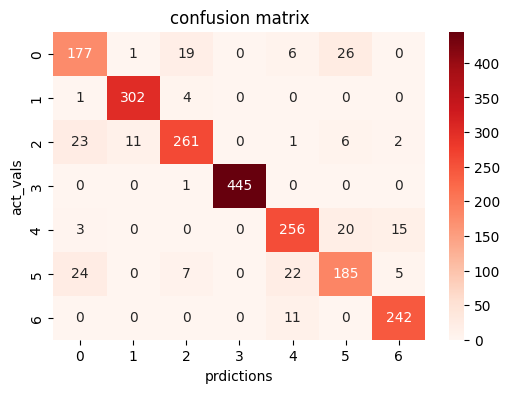

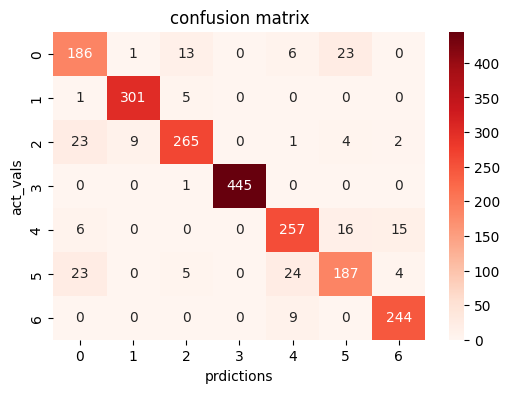

In [40]:
pred=[rfpred,dpred,lgpred,xgbpred,lgbmpred]
for i in range(len(pred)):
    confusion_matrix=pd.crosstab(yval, pred[i], rownames=['act_vals'], colnames=['prdictions'])
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds')
    plt.title('confusion matrix')
    plt.show()

In [41]:
test_data=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [42]:
test_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [43]:
test_df=test_data[features]

In [44]:
test_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CALC
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,Male,yes,yes,no,no,Sometimes
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,Female,yes,yes,no,no,Sometimes
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,Female,yes,yes,no,no,Sometimes
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,Male,yes,yes,no,no,Sometimes
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,Female,yes,yes,no,no,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,Male,yes,no,no,no,Sometimes
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,Female,no,yes,no,no,Sometimes
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,Female,no,yes,no,no,Sometimes
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,Male,yes,yes,no,no,no


In [45]:
test_df=pd.get_dummies(test_df)

In [46]:
xtrain.shape

(18682, 21)

In [47]:
test_df.shape

(13840, 22)

In [48]:
if 'CALC_Always' in test_df.columns:
    test_df.drop('CALC_Always', axis=1, inplace=True)
test_pred = model.predict(test_df)

In [49]:
prediction=rfmodel.predict(test_df)
prediction1=dmodel.predict(test_df)
prediction2=lgmodel.predict(test_df)
prediction3=xgbmodel.predict(test_df)
prediction4=lgbmmodel.predict(test_df)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [50]:
predictions=[prediction,
prediction1,
prediction2,
prediction3,
prediction4]
predictions

[array([1, 5, 3, ..., 6, 4, 1]),
 array([1, 5, 3, ..., 6, 4, 1]),
 array([1, 5, 3, ..., 6, 6, 1]),
 array([1, 5, 3, ..., 6, 4, 1]),
 array([1, 5, 3, ..., 6, 4, 1])]

In [51]:

categories =['Overweight_Level_II', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_I',
       'Insufficient_Weight']

def map_to_categorical(numerical):
    return categories[numerical]

for i in range(len(predictions)):
    numerical_array = predictions[i]
    predictions[i] = np.vectorize(map_to_categorical)(numerical_array)
    print(predictions[i])

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Insufficient_Weight' 'Obesity_Type_II']
['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [52]:
predictions

[array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
        'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
       dtype='<U19'),
 array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
        'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
       dtype='<U19'),
 array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
        'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_II'],
       dtype='<U19'),
 array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
        'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
       dtype='<U19'),
 array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
        'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
       dtype='<U19')]

In [53]:
result=pd.DataFrame({'id': test_data['id'], 'NObeyesdad': predictions[0]})
result1=pd.DataFrame({'id': test_data['id'], 'NObeyesdad': predictions[1]})
result2=pd.DataFrame({'id': test_data['id'], 'NObeyesdad': predictions[2]})
result3=pd.DataFrame({'id': test_data['id'], 'NObeyesdad': predictions[3]})
result4=pd.DataFrame({'id': test_data['id'], 'NObeyesdad': predictions[4]})

In [54]:
result

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [55]:
result.to_csv('mysub.csv', index=False)
result1.to_csv('mysub1.csv', index=False)
result2.to_csv('mysub2.csv', index=False)
result3.to_csv('mysub3.csv', index=False)
result4.to_csv('mysub4.csv', index=False)

In [56]:
print(result)
print(result1)
print(result2)
print(result3)
print(result4)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_